In [1]:
import numpy as np
import astropy
from astropy import units as u
from astropy import constants as c
import pandas
import matplotlib
from matplotlib import pyplot as plt

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [23]:
df = pandas.read_csv(r'C:\Users\edwin\OneDrive\Desktop\Wits\experimental\Essay\proposal\plot\asu.csv',delimiter=';')
xa=12
ya=10
ra=np.sqrt((xa**2)+(ya**2))

In [6]:
p0=np.array(df['P0'])
p1=np.array(df['P1'])
ptype=np.array(df['Type'])

P0=np.array(0,dtype=np.float)
P1=np.array(0,dtype=np.float)
Ptype=np.array(0,dtype=np.str)

for i in range(0,len(p0)): 
    a1=str(p0[i])
    a2=str(p1[i])
    if (is_number(a1)==True) and (is_number(a2)==True):
        a1temp=float(a1)
        a2temp=float(a2)
        P0=np.append(P0,a1temp)
        P1=np.append(P1,a2temp)
        Ptype=np.append(Ptype,ptype[i])

P0=np.delete(P0,0)
P1=np.delete(P1,0)
Ptype=np.delete(Ptype,0)

[0.69374767 0.31587319 1.24069904 ... 0.00288423 1.18146338 0.94478389]
[2.097000e-15 3.603900e-13 5.644600e-16 ... 1.410200e-20 1.363050e-15
 1.626279e-14]
['nan' 'NRAD' 'nan' ... 'HE[rbs+14]' 'nan' 'nan']
2092
2092
2092


Text(0.5,1,'P-Pdot diagram.')

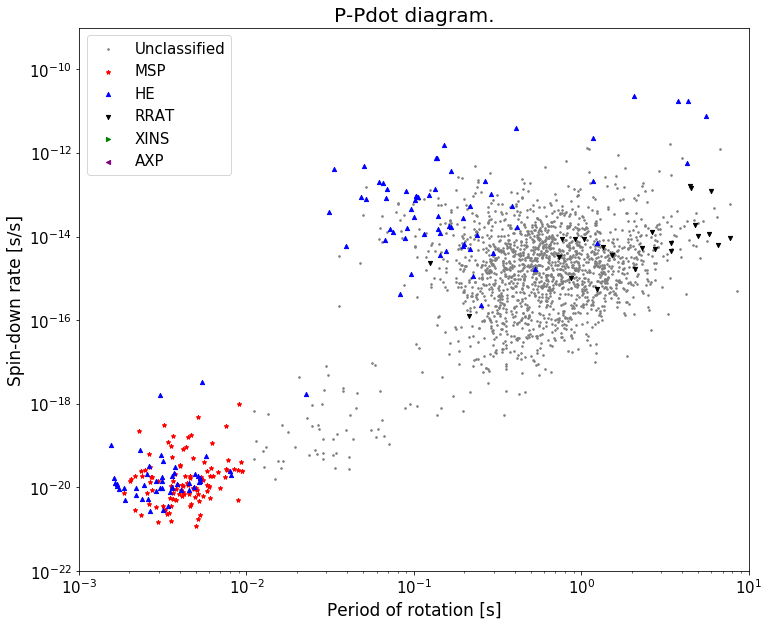

In [44]:
HEp0=np.array(0,dtype=np.float)
HEp1=np.array(0,dtype=np.float)
RRATp0=np.array(0,dtype=np.float)
RRATp1=np.array(0,dtype=np.float)
NRADp0=np.array(0,dtype=np.float)
NRADp1=np.array(0,dtype=np.float)
XINSp0=np.array(0,dtype=np.float)
XINSp1=np.array(0,dtype=np.float)
AXPp0=np.array(0,dtype=np.float)
AXPp1=np.array(0,dtype=np.float)
UNp0=np.array(0,dtype=np.float)
UNp1=np.array(0,dtype=np.float)
MILp0=np.array(0,dtype=np.float)
MILp1=np.array(0,dtype=np.float)
for w in range(0,len(P0)):
    if 'HE' in Ptype[w]:
        #print('yes')
        HEp0=np.append(HEp0,P0[w])
        HEp1=np.append(HEp1,P1[w])
    elif 'RRAT' in Ptype[w]:
        RRATp0=np.append(RRATp0,P0[w])
        RRATp1=np.append(RRATp1,P1[w])
    elif 'NRAD' in Ptype[w]:
        NRADp0=np.append(NRADp0,P0[w])
        NRADp1=np.append(NRADp1,P1[w])
    elif 'XINS' in Ptype[w]:
        XINSp0=np.append(XINSp0,P0[w])
        XINSp1=np.append(XINSp1,P1[w])
    elif 'AXP' in Ptype[w]:
        AXPp0=np.append(AXPp0,P0[w])
        AXPp1=np.append(AXPp1,P1[w])
    elif P0[w]<0.01:
        MILp0=np.append(MILp0,P0[w])
        MILp1=np.append(MILp1,P1[w])
    else:
        UNp0=np.append(UNp0,P0[w])
        UNp1=np.append(UNp1,P1[w])
UNp0=np.delete(UNp0,0)
UNp1=np.delete(UNp1,0)
MILp0=np.delete(MILp0,0)
MILp1=np.delete(MILp1,0)
HEp0=np.delete(HEp0,0)
HEp1=np.delete(HEp1,0)
RRATp0=np.delete(RRATp0,0)
RRATp1=np.delete(RRATp1,0)
XINSp0=np.delete(XINSp0,0)
XINSp1=np.delete(XINSp1,0)
AXPp0=np.delete(AXPp0,0)
AXPp1=np.delete(AXPp1,0)

xa=12
ya=10
ra=np.sqrt((xa**2)+(ya**2))
plt.figure(figsize=(xa,ya))
plt.scatter(UNp0,UNp1,color='grey',label='Unclassified',s=10,marker=".")
plt.scatter(MILp0,MILp1,color='RED',label='MSP',s=17.5,marker="*")
plt.scatter(HEp0,HEp1,color='blue',label='HE',s=17.5,marker="^")
plt.scatter(RRATp0,RRATp1,color='black',label='RRAT',s=17.5,marker="v")
plt.scatter(XINSp0,XINSp1,color='green',label='XINS',s=17.5,marker=">")
plt.scatter(AXPp0,AXPp1,color='purple',label='AXP',s=17.5,marker="<")

#plt.scatter((P0),(P1))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e+1)
plt.ylim(1e-22,1e-9)
plt.legend(prop={"size":15})

plt.xlabel('Period of rotation [s]',size=17)
plt.ylabel('Spin-down rate [s/s]',size=17)
plt.title('P-Pdot diagram.',size=20)

-13.639030832794568


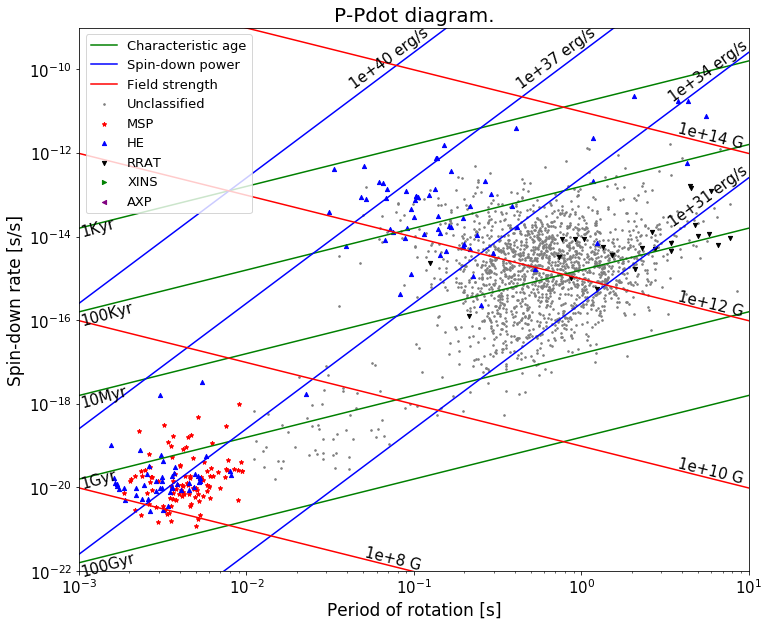

In [45]:
plt.figure(figsize=(xa,ya))
ax=plt.axes()

#1 for lines and 0 to disable 
CharAge=1 # --characteristic age lines
MinMag=1 # --Minimum mag field stengh lines
SpinDown=1 # -- Spind down power lines

if CharAge==1:
    anglet =(np.arctan((ya/xa)*0.33137)*(180/np.pi))
    years=np.array([1e+3,100e+3,10e+6,1e+9,100e+9])
    agetile=np.array(['1Kyr','100Kyr','10Myr','1Gyr','100Gyr'])
    tosec=(3.154*1e+7)
    p0range=np.logspace(-3,1,1000)#*(1/(2*age))
    p1range=np.logspace(-22,9,1000)
    for i in range(0,len(years)):
        age=years[i]*tosec
        ax.loglog(p0range,p0range/(2*age),color='green')
        ax.text(1e-3,p0range[1]/(2*age),agetile[i],rotation=anglet,size=15)#,color='Green')
    plt.plot(0,0,label='Characteristic age',color='green')

if SpinDown==1:
    Inertia=1e+45
    power=np.array([1e31,1e34,1e37,1e40])
    powertile=np.array(['1e+31 erg/s','1e+34 erg/s','1e+37 erg/s','1e+40 erg/s'])
    p0range=np.logspace(-3,1,1000)
    p1range=np.logspace(-22,9,1000)
    for i in range(0,len(power)):
        a=(power[i])/(4*(np.pi**2)*Inertia)
        ax.loglog(p0range,(p0range**3)*a,color='blue')
    anglep =(np.arctan((ya/xa)*0.87305)*(180/np.pi))
    #print(anglep)
    ax.text(0.04,6e-10,powertile[-1],rotation=anglep,size=15)#,color='Green')
    ax.text(0.4,6e-10,powertile[2],rotation=anglep,size=15)#,color='Green')
    ax.text(3.2,3e-10,powertile[1],rotation=anglep,size=15)#,color='Green')
    ax.text(3.2,3e-13,powertile[0],rotation=anglep,size=15)#,color='Green')
    plt.plot(0,0,label='Spin-down power',color='blue')


if MinMag==1:
    Inertia=1e+45
    rad=1e6
    cspeed=3e10
    B=np.array([1e8,1e10,1e12,1e14])
    Btile=np.array(['1e+8 G','1e+10 G','1e+12 G','1e+14 G'])
    p0range=np.logspace(-3,1,1000)
    p1range=np.logspace(-22,9,1000)
    for i in range(0,len(B)):
        a=(1/p0range)*(B[i]**2)*((8*(np.pi**2)*(rad**6))/(3*Inertia*(cspeed**3)))
        ax.loglog(p0range,a,color='red')
    angleb =(np.arctan(-1*(ya/xa)*0.291176)*(180/np.pi))
    print(angleb)
    ax.text(3.7,3e-12,Btile[-1],rotation=angleb,size=15)#,color='Green')
    ax.text(3.7,3e-16,Btile[2],rotation=angleb,size=15)#,color='Green')
    ax.text(3.7,3e-20,Btile[1],rotation=angleb,size=15)#,color='Green')
    ax.text(5e-2,2.25e-22,Btile[0],rotation=angleb,size=15)#,color='Green')
    plt.plot(0,0,label='Field strength',color='red')

ax.scatter(UNp0,UNp1,color='grey',label='Unclassified',s=10,marker=".")
ax.scatter(MILp0,MILp1,color='RED',label='MSP',s=17.5,marker="*")
ax.scatter(HEp0,HEp1,color='blue',label='HE',s=17.5,marker="^")
ax.scatter(RRATp0,RRATp1,color='black',label='RRAT',s=17.5,marker="v")       #plots the pulsars
ax.scatter(XINSp0,XINSp1,color='green',label='XINS',s=17.5,marker=">")
ax.scatter(AXPp0,AXPp1,color='purple',label='AXP',s=17.5,marker="<")



plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e+1)
plt.ylim(1e-22,1e-9)
ax.legend(prop={"size":13})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Period of rotation [s]',size=17)
plt.ylabel('Spin-down rate [s/s]',size=17)
plt.title('P-Pdot diagram.',size=20)
#print(XINSp1)
plt.show()
#print(p0range)
